In [ ]:
from __future__ import print_function
import numpy as np 
import math
from sklearn import datasets


def relu(X):
	return np.maximum(X, 0)

def relu_derivative(X):
	return 1. * (X > 0)

def build_model(X,hidden_nodes,output_dim=2):
    model = {}
    input_dim = X.shape[1]
    model['W1'] = np.random.randn(input_dim, hidden_nodes) / np.sqrt(input_dim)
    model['b1'] = np.zeros((1, hidden_nodes))
    model['W2'] = np.random.randn(hidden_nodes, output_dim) / np.sqrt(hidden_nodes)
    model['b2'] = np.zeros((1, output_dim))
    return model

def feed_forward(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    #a1 = np.tanh(z1)
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    out = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return z1, a1, z2, out

def calculate_loss(model,X,y,reg_lambda):
    num_examples = X.shape[0]
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1, a1, z2, out = feed_forward(model, X)
    probs = out / np.sum(out, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * loss

def backprop(X,y,model,z1,a1,z2,output,reg_lambda):
    delta3 = output
    delta3[range(X.shape[0]), y] -= 1  #yhat - y
    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    #delta2 = delta3.dot(model['W2'].T) * (1 - np.power(a1, 2)) #if tanh
    delta2 = delta3.dot(model['W2'].T) * relu_derivative(a1) #if ReLU
    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)
    # Add regularization terms
    dW2 += reg_lambda * model['W2']
    dW1 += reg_lambda * model['W1']
    return dW1, dW2, db1, db2


def train(model, X, y, num_passes=10000, reg_lambda = .1, learning_rate=0.1):
    # Batch gradient descent
    done = False
    previous_loss = float('inf')
    i = 0
    losses = []
    while done == False:  #comment out while performance testing
    #while i < 1500:
    	#feed forward
        z1,a1,z2,output = feed_forward(model, X)
        #backpropagation
        dW1, dW2, db1, db2 = backprop(X,y,model,z1,a1,z2,output,reg_lambda)
        #update weights and biases
        model['W1'] -= learning_rate * dW1
        model['b1'] -= learning_rate * db1
        model['W2'] -= learning_rate * dW2
        model['b2'] -= learning_rate * db2
        if i % 1000 == 0:
        	loss = calculate_loss(model, X, y, reg_lambda)
        	losses.append(loss)
        	print("Loss after iteration %i: %f" %(i, loss)  ) #uncomment once testing finished, return mod val to 1000
        	if (previous_loss-loss)/previous_loss < 0.01:
        		done = True
        		#print i
        	previous_loss = loss
        i += 1
    return model, losses

In [7]:
X, y = datasets.make_moons(16, noise=0.10)

In [12]:
admitted = X[y==1]
not_admitted = X[y==0]

In [9]:
import matplotlib.pyplot as plt

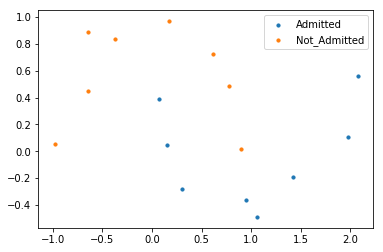

In [13]:
plt.scatter(admitted[:,0], admitted[:,1], s=10, label="Admitted")
plt.scatter(not_admitted[:,0], not_admitted[:,1], s=10, label="Not_Admitted")
plt.legend()
plt.show()

In [14]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality 
learning_rate = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [15]:
model = build_model(X,20,2)

In [16]:
model

{'W1': array([[-0.41275285, -0.7906758 , -0.02301316,  0.25624831,  0.95874472,
          0.21413001, -0.5416841 , -0.24465723,  0.80455572,  0.04007944,
         -1.08643174, -0.2792233 ,  0.97261482,  0.46282486,  0.32043362,
          0.59597028,  0.48234088, -0.01138795, -0.07279107, -0.23359306],
        [-0.44049624, -0.07539231, -0.4476043 ,  0.10529877,  0.38517169,
          0.17726684,  0.6458172 , -0.67755172,  0.24170746, -0.31811499,
         -0.01650843,  0.75952548,  0.44681859, -0.39181786, -0.22457018,
          0.31434903, -1.07893014, -0.13886313,  0.98781289,  0.23014603]]),
 'b1': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]),
 'W2': array([[ 0.09742775,  0.33437412],
        [ 0.20551091, -0.16771804],
        [-0.0388078 , -0.15019175],
        [-0.06421863,  0.03269642],
        [-0.24397172,  0.15379373],
        [-0.1286809 , -0.23512731],
        [ 0.0984256 , -0.15758291],
        [-0.22934547,  0.09231076

In [17]:
model, losses = train(model,X, y, reg_lambda=reg_lambda, learning_rate=learning_rate)

Loss after iteration 0: 0.592520
Loss after iteration 1000: 0.054870
Loss after iteration 2000: 0.037632


D:\Users\atans\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in double_scalars


Loss after iteration 3000: 0.035940
Loss after iteration 4000: 0.035488
Loss after iteration 5000: 0.035256


In [5]:
output = feed_forward(model, X)
preds = np.argmax(output[3], axis=1)